In [73]:
import pandas as pd

In [74]:
data = pd.read_csv("./cereal.csv")

In [75]:

data.tail()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193
76,Wheaties Honey Gold,G,C,110,2,1,200,1.0,16.0,8,60,25,1,1.0,0.75,36.187559


In [76]:
num_data = data.drop(['mfr','name','type','weight','shelf','cups'],1)
num_data.head()
print(num_data.dtypes)

calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars        int64
potass        int64
vitamins      int64
rating      float64
dtype: object


In [77]:
filt_d = num_data[num_data>=0].dropna()
print(len(filt_d))
filt_d.head()

74


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,rating
0,70,4,1,130,10.0,5.0,6.0,280.0,25,68.402973
1,120,3,5,15,2.0,8.0,8.0,135.0,0,33.983679
2,70,4,1,260,9.0,7.0,5.0,320.0,25,59.425505
3,50,4,0,140,14.0,8.0,0.0,330.0,25,93.704912
5,110,2,2,180,1.5,10.5,10.0,70.0,25,29.509541


In [78]:
filt_d.iloc[4].name

5

In [79]:
X= filt_d.drop('rating',1)
y= filt_d['rating']

In [80]:
X.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
0,70,4,1,130,10.0,5.0,6.0,280.0,25
1,120,3,5,15,2.0,8.0,8.0,135.0,0
2,70,4,1,260,9.0,7.0,5.0,320.0,25
3,50,4,0,140,14.0,8.0,0.0,330.0,25
5,110,2,2,180,1.5,10.5,10.0,70.0,25


In [81]:
y.head()

0    68.402973
1    33.983679
2    59.425505
3    93.704912
5    29.509541
Name: rating, dtype: float64

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [83]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [84]:
from sklearn.decomposition import PCA

pca = PCA()
#X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)
X_s = sc.fit_transform(X)
X_t = pca.fit_transform(X_s)

In [85]:
#print(abs(pca.components_[0]))
pca_val = {}
for i in range(len(X.columns)):
    pca_val[X.columns[i]] = pca.components_[0][i]
importance_feat = dict(sorted(pca_val.items(), key=lambda item: item[1],reverse=True))
print(importance_feat)
top_3_feat = ['potass', 'fiber', 'protein']

{'fiber': 0.5622360469009114, 'potass': 0.5474015537971372, 'protein': 0.3922449707604722, 'fat': 0.09269959569549298, 'sugars': -0.09803778951173366, 'vitamins': -0.12901098402307432, 'sodium': -0.17048874118468046, 'calories': -0.22757223602905718, 'carbo': -0.3386473958024392}


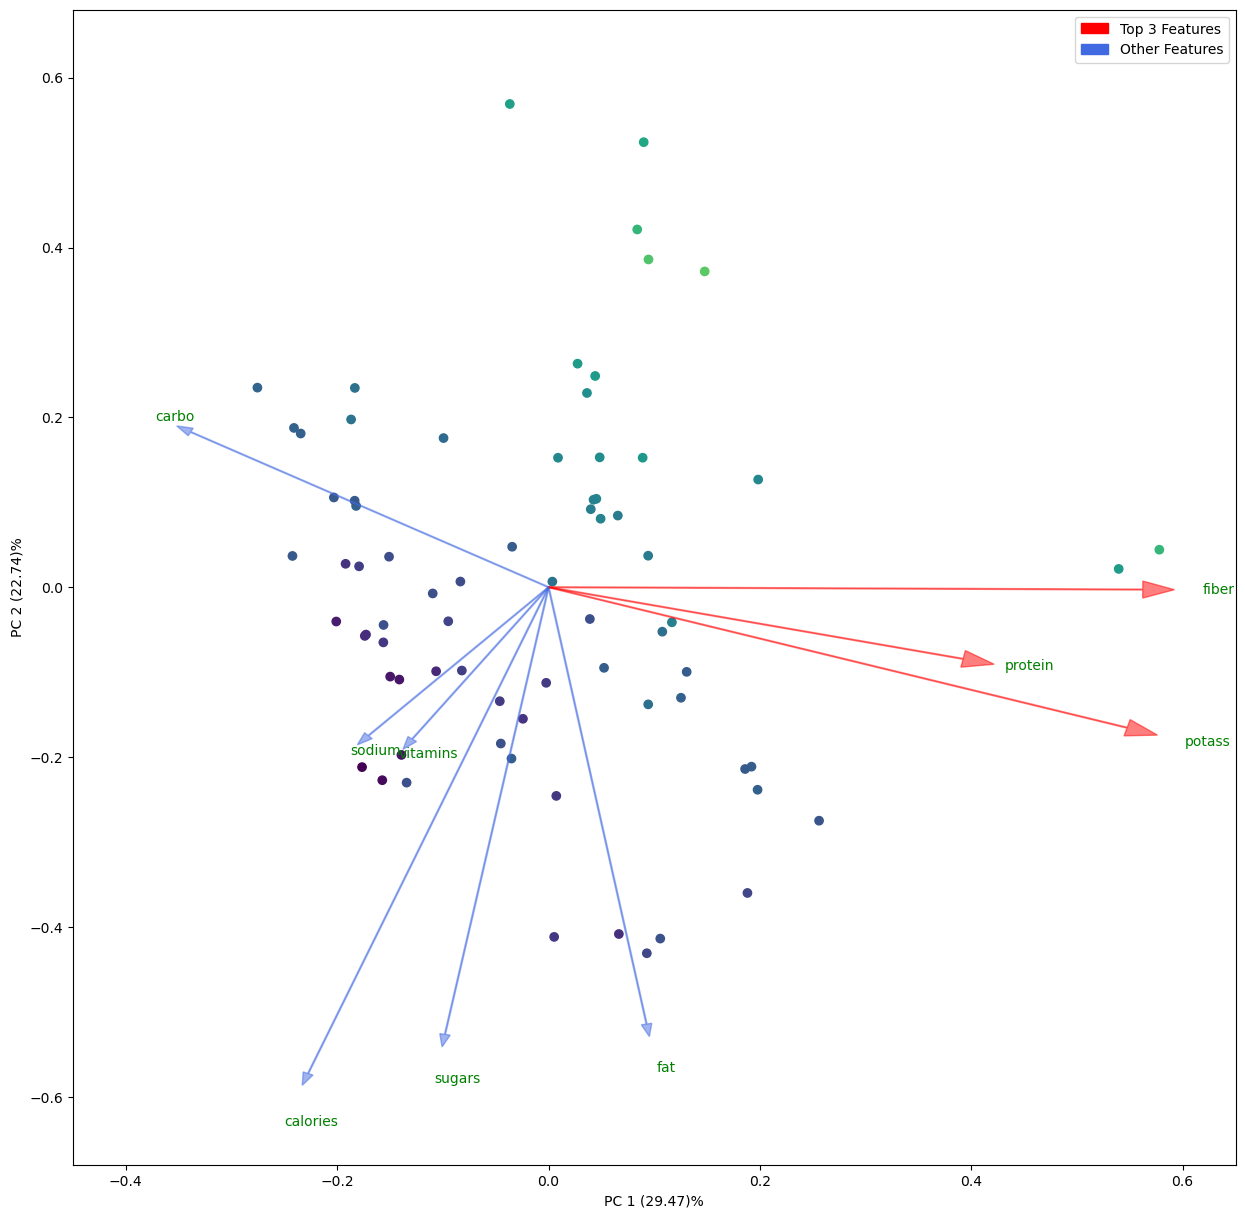

In [100]:
'''
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)    
pca = PCA()
x_new = pca.fit_transform(X)
'''
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
def myplot(score,coeff,labels=None):

    pop_a = mpatches.Patch(color='r', label='Top 3 Features')
    pop_b = mpatches.Patch(color='royalblue', label='Other Features')

    plt.legend(handles=[pop_a,pop_b])
    plt.style.use(['default'])
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    cmap = plt.get_cmap('jet', 12)
    #plt.scatter(xs * scalex,ys * scaley, c = y_train)
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        #print(coeff[i,0])
        if X.columns[i] in top_3_feat:
            plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5,head_width = 0.02)
        else:
            plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'royalblue',alpha = 0.5,head_width = 0.01)
        #plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = cmap[i], cmap="summer",alpha = 0.5,head_width = 0.02)
        if labels is None:
            plt.text(coeff[i,0]* 1.10, coeff[i,1] * 1.10, X.columns[i], color = 'g', ha = 'left', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.figure(figsize=(15,15))
plt.xlim(-0.45,0.65)
plt.ylim(-0.68,0.68)
plt.xlabel("PC 1 ({})%".format(29.47))
plt.ylabel("PC 2 ({})%".format(22.74))
#plt.grid()

#Call the function. Use only the 2 PCs.
#myplot(X_train[:,0:2],np.transpose(pca.components_[0:2, :3]))
myplot(X_t[:,0:2],np.transpose(pca.components_[0:2,:]))
plt.show()


In [17]:
explained_variance = pca.explained_variance_ratio_

In [18]:
print(explained_variance)

[0.29476014 0.22746754 0.19026817 0.10683099 0.07409098 0.0569787
 0.04094988 0.0065451  0.00210849]


Ignore the stuff down below, it was just me experimenting with different packages

In [75]:
xvector = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
yvector = pca.components_[1]

xs = pca.transform(X_test)[:,0] # see 'prcomp(my_data)$x' in R
ys = pca.transform(X_test)[:,1]

In [76]:
print(xvector)

[-0.11270251  0.31708115  0.17088242 -0.12729321  0.4793785  -0.32881776
  0.00141293  0.49525839 -0.00149652  0.30351962  0.13975707 -0.38273639]


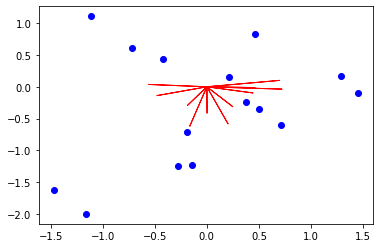

In [80]:
'''from matplotlib import pyplot as plt
for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    #plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,list(X_test.columns.values)[i], color='r')

for i in range(len(xs)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.plot(xs[i], ys[i], 'bo')
   # plt.text(xs[i]*1.2, ys[i]*1.2, list(X_test.index)[i], color='b')

plt.show()
'''

In [88]:
#%pip install pca

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [101]:
from pca import pca

In [63]:
list(X.columns)

['calories',
 'protein',
 'fat',
 'sodium',
 'fiber',
 'carbo',
 'sugars',
 'potass',
 'vitamins',
 'shelf',
 'weight',
 'cups']

In [98]:
X_pca = pd.DataFrame(data = X, columns=list(X.columns))
X_pca.reset_index(drop=True, inplace=True)

In [99]:
X_pca.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33
1,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00
2,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33
3,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50
4,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75


[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [12] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


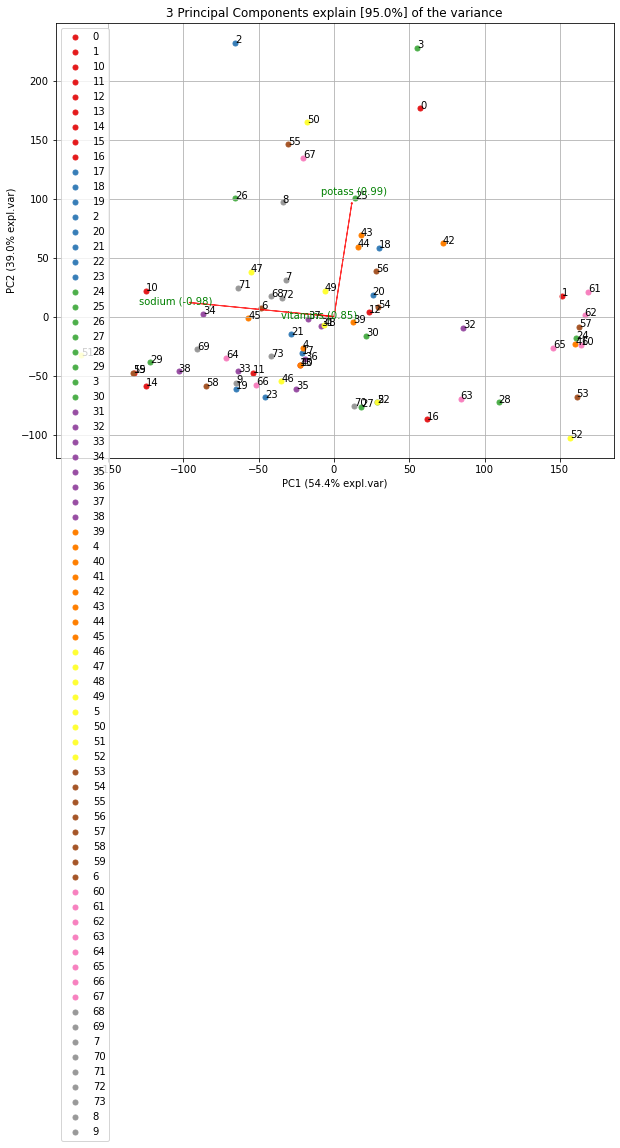

In [102]:
# Initialize to reduce the data up to the number of componentes that explains 95% of the variance.
model = pca(n_components=0.95)

# Or reduce the data towards 2 PCs
#model = pca(n_components=3)

# Fit transform
results = model.fit_transform(X_pca)

# Plot explained variance
#fig, ax = model.plot()

# Scatter first 2 PCs
#fig, ax = model.scatter()

# Make biplot with the number of features
fig, ax = model.biplot(n_feat=3)

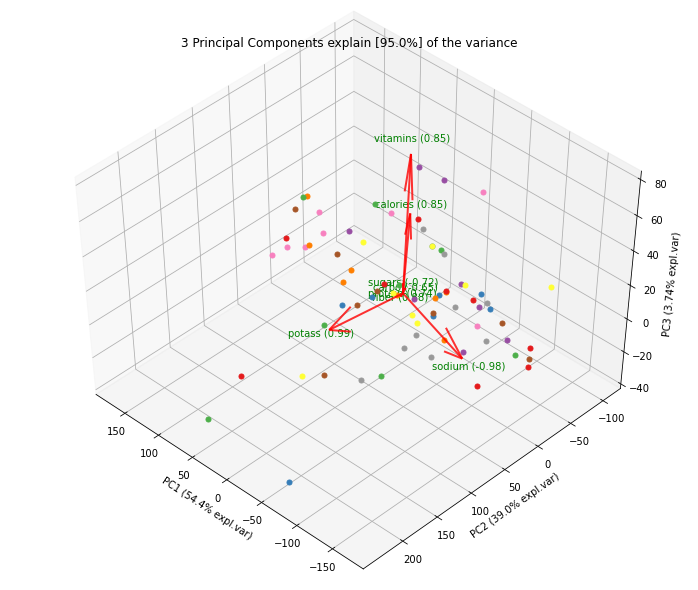

In [104]:
ax = model.biplot3d(n_feat=8, legend=False)

In [92]:
results['topfeat']

,PC,feature,loading,type
0,PC1,sodium,-0.984892,best
1,PC2,potass,0.991625,best
2,PC3,vitamins,0.853993,best
3,PC4,calories,0.849452,best
4,PC5,sugars,-0.721689,best
5,PC6,carbo,-0.649347,best
6,PC7,fiber,0.880890,best
7,PC8,protein,0.742974,best
8,PC9,shelf,-0.825152,best
9,PC10,fat,-0.781403,best
